### Inspects the transactions CSV and breaks down payments for the month by payment type, the total membership revenue, the totals for each day of the month, and finally displays a graph of all months cumulative membership income

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
def str_to_dt(date_string):
    return datetime.strptime(date_string, '%m/%d/%Y')

In [4]:
def str_to_dom(date_string):
    dt = datetime.strptime(date_string, '%m/%d/%Y')
    return int(dt.day)

In [5]:
df = pd.read_csv('/home/data/transactions.csv')

In [6]:
df["datetime"] = df['Date'].apply(str_to_dt)

In [7]:
pp_df = df[(df['Account Name'] == 'PayPal Account')]

In [8]:
cols_2_hide = ['Description','Original Description']
pp_df = pp_df.drop(cols_2_hide, axis=1)

*Note: This does not include paypal fees*

# Membership income from March 2020

In [9]:
march_df = pp_df[ (pp_df['datetime']>pd.Timestamp(2020,3,1)) & (pp_df['datetime']<pd.Timestamp(2020,3,30)) ]
march_df_inc = march_df[(march_df['Category'] == 'Income')]
march_df_fees = march_df[(march_df['Category'] == 'Fees & Charges')]
march_inc_by_day = march_df_inc.groupby("Date")['Amount'].sum()

## Number of membership income transactions

In [10]:
march_count = march_df_inc.loc[(march_df['Amount'] > 10.0)]['Date'].count()
print('Total: %d\n' % (march_count))

Num_startving = march_df_inc.loc[(march_df['Amount'] == 25.0)]['Date'].count()
Num_individual = march_df_inc.loc[(march_df['Amount'] == 50.0)]['Date'].count()
Num_family = march_df_inc.loc[(march_df['Amount'] == 80.0)]['Date'].count()

print('%d indivual memberships\n%d starving maker memberships\n%d family memberships' % (Num_individual, Num_startving, Num_family))

Total: 23

15 indivual memberships
6 starving maker memberships
2 family memberships


### Other transactions

In [11]:
march_df_inc.loc[(march_df['Amount'] != 25.0) & (march_df['Amount'] != 50.0) & (march_df['Amount'] != 80.0)]

,Date,Amount,Transaction Type,Category,Account Name,Labels,Notes,datetime
114,3/22/2020,10.0,credit,Income,PayPal Account,NaN,NaN,2020-03-22


## Total membership income

In [12]:
march_inc = march_df_inc["Amount"].sum()
print('$%d' % (march_inc))

$1070


## Membership income by date

In [13]:
pd.DataFrame(march_inc_by_day)

,Amount
Date,
3/02/2020,130.0
3/03/2020,100.0
3/06/2020,50.0
3/07/2020,50.0
3/09/2020,100.0
3/10/2020,50.0
3/11/2020,75.0
3/13/2020,50.0
3/15/2020,25.0


# Membership income from April 2020

In [14]:
april_df = pp_df[ (pp_df['datetime']>pd.Timestamp(2020,4,1)) & (pp_df['datetime']<pd.Timestamp(2020,4,30)) ]
april_df_inc = april_df[(april_df['Category'] == 'Income')]
april_df_fees = april_df[(april_df['Category'] == 'Fees & Charges')]
april_inc_by_day = april_df_inc.groupby("Date")['Amount'].sum()

## Number of membership income transactions

In [15]:
april_count = april_df_inc.loc[(april_df['Amount'] > 10.0)]['Date'].count()

print('Total: %d (%d)\n' % (april_count, april_count - march_count))

Num_startving = april_df_inc.loc[(april_df['Amount'] == 25.0)]['Date'].count()
Num_individual = april_df_inc.loc[(april_df['Amount'] == 50.0)]['Date'].count()
Num_family = april_df_inc.loc[(april_df['Amount'] == 80.0)]['Date'].count()

print('%d indivual memberships\n%d starving maker memberships\n%d family memberships' % (Num_individual, Num_startving, Num_family))

Total: 22 (-1)

15 indivual memberships
4 starving maker memberships
2 family memberships


### Other transactions

In [16]:
april_df_inc.loc[(april_df['Amount'] != 25.0) & (april_df['Amount'] != 50.0) & (april_df['Amount'] != 80.0)]

,Date,Amount,Transaction Type,Category,Account Name,Labels,Notes,datetime
60,4/22/2020,10.0,credit,Income,PayPal Account,NaN,NaN,2020-04-22
91,4/06/2020,350.0,credit,Income,PayPal Account,NaN,NaN,2020-04-06


## Total april membership income

In [17]:
april_inc = april_df_inc["Amount"].sum()
print('$%d (%+d)' % (april_inc, april_inc-march_inc))

$1370 (+300)


## Membership income by date for april

In [18]:
pd.DataFrame(april_inc_by_day)

,Amount
Date,
4/02/2020,180.0
4/03/2020,50.0
4/06/2020,400.0
4/07/2020,50.0
4/09/2020,100.0
4/10/2020,50.0
4/11/2020,50.0
4/13/2020,50.0
4/15/2020,25.0


# Membership income from May 2020

In [19]:
may_df = pp_df[ (pp_df['datetime']>pd.Timestamp(2020,5,1)) & (pp_df['datetime']<pd.Timestamp(2020,5,31)) ]
may_df_inc = may_df[(may_df['Category'] == 'Income')]
may_df_fees = may_df[(may_df['Category'] == 'Fees & Charges')]
may_inc_by_day = may_df_inc.groupby("Date")['Amount'].sum()

## Number of membership income transactions

In [20]:
may_count = may_df_inc.loc[(may_df['Amount'] > 10.0)]['Date'].count()

print('Total: %d (%d)\n' % (may_count, may_count - march_count))

Num_startving = may_df_inc.loc[(may_df['Amount'] == 25.0)]['Date'].count()
Num_individual = may_df_inc.loc[(may_df['Amount'] == 50.0)]['Date'].count()
Num_family = may_df_inc.loc[(may_df['Amount'] == 80.0)]['Date'].count()

print('%d indivual memberships\n%d starving maker memberships\n%d family memberships' % (Num_individual, Num_startving, Num_family))

Total: 22 (-1)

16 indivual memberships
4 starving maker memberships
2 family memberships


### Other transactions

In [21]:
may_df_inc.loc[(may_df['Amount'] != 25.0) & (may_df['Amount'] != 50.0) & (may_df['Amount'] != 80.0)]

,Date,Amount,Transaction Type,Category,Account Name,Labels,Notes,datetime
8,5/22/2020,10.0,credit,Income,PayPal Account,NaN,NaN,2020-05-22


## Total membership income

In [22]:
may_inc = may_df_inc["Amount"].sum()
print('$%d (%+d)' % (may_inc, may_inc-april_inc))

$1070 (-300)


## Membership income by date

In [23]:
pd.DataFrame(may_inc_by_day)

,Amount
Date,
5/02/2020,180.0
5/03/2020,50.0
5/06/2020,100.0
5/07/2020,50.0
5/09/2020,100.0
5/10/2020,50.0
5/11/2020,50.0
5/13/2020,50.0
5/15/2020,25.0


# Monthly cumulative income comparison

In [24]:
march_df = march_inc_by_day.to_frame().reset_index()
march_df["dom"] = march_df['Date'].apply(str_to_dom)
march_dom_amnt = march_df.groupby("dom")['Amount'].sum()

In [25]:
april_df = april_inc_by_day.to_frame().reset_index()
april_df["dom"] = april_df['Date'].apply(str_to_dom)
april_dom_amnt = april_df.groupby("dom")['Amount'].sum()

In [26]:
may_df = may_inc_by_day.to_frame().reset_index()
may_df["dom"] = may_df['Date'].apply(str_to_dom)
may_dom_amnt = may_df.groupby("dom")['Amount'].sum()

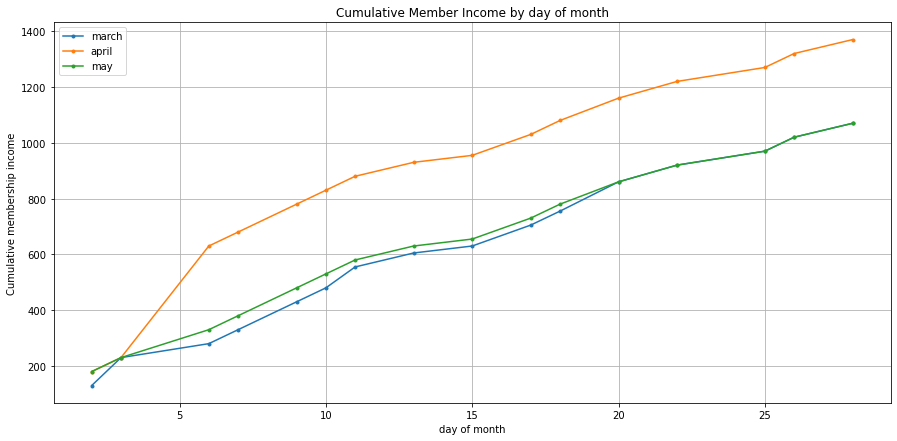

In [27]:
plt.plot(march_dom_amnt.cumsum(), marker='.', label='march')
plt.plot(april_dom_amnt.cumsum(), marker='.', label='april')
plt.plot(may_dom_amnt.cumsum(), marker='.', label='may')
plt.title('Cumulative Member Income by day of month')
plt.xlabel('day of month')
plt.ylabel('Cumulative membership income')
plt.legend()
plt.grid(True)